# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Meta Platforms, Inc. (FB)
- Alphabet Inc. (GOOG)
- Raytheon Technologies Corporation (RTX)
- Lockheed Martin Corporation (LMT)
- Bank of America Corporation (BAC)
- JPMorgan Chase & Co. (JPM)

Importiamo ora i titoli direttamente da Yahoo Finance

In [16]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
fb_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 2. Statistiche descrittive

### 2.a Rendimenti semplici e composti

#### Settore Tecnologico (TSLA e GOOG)

Tabella dei rendimenti semplici Netti e Lordi

In [17]:
# Raggruppamento dei dati con media
fb_group = fb_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

fb_month_returns = fb_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per meta (FB)
rendimenti_netti_fb = np.log(fb_month_returns/fb_month_returns.shift(1))
rendimenti_lordi_fb = np.log(rendimenti_netti_fb + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Meta"] = rendimenti_netti_fb
rendimenti_tecno["Rendimenti Lordi Meta"] = rendimenti_lordi_fb
rendimenti_tecno["Rendimenti Netti Alphabet"] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet"] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Alphabet,Rendimenti Lordi Alphabet
Date,,,,
2012-06-30,-0.075904,-0.078939,-0.059138,-0.060959
2012-07-31,-0.022612,-0.022872,0.043593,0.042669
2012-08-31,-0.362019,-0.449446,0.105718,0.100495
2012-09-30,0.025514,0.025194,0.080848,0.077746
2012-10-31,-0.000406,-0.000406,0.010737,0.010680
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.056498,0.054959
2021-08-31,0.026913,0.026557,0.051407,0.050129
2021-09-30,0.002614,0.002611,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

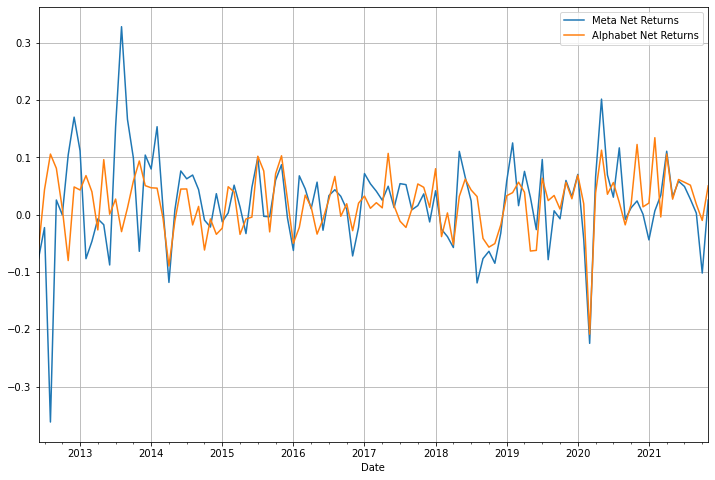

In [18]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta Net Returns")
rendimenti_tecno["Rendimenti Netti Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet Net Returns")
plt.legend(loc="upper right")
plt.show()

Tabella dei rendimenti composti

In [19]:
# Rendimenti composti per Meta (FB)
cumul_daily_return_fb = (1 + rendimenti_netti_fb).cumprod()
rendimenti_tecno["Rendimenti Composti Meta"] = cumul_daily_return_fb

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Composti Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Composti Meta", "Rendimenti Composti Alphabet"]]

,Rendimenti Composti Meta,Rendimenti Composti Alphabet
Date,,
2012-06-30,0.924096,0.960711
2012-07-31,0.903201,1.002591
2012-08-31,0.576225,1.108583
2012-09-30,0.590927,1.198210
2012-10-31,0.590687,1.211075
...,...,...
2021-07-31,7.487620,7.603153
2021-08-31,7.689137,7.994008
2021-09-30,7.709239,8.139652


Grafico dei rendimenti composti

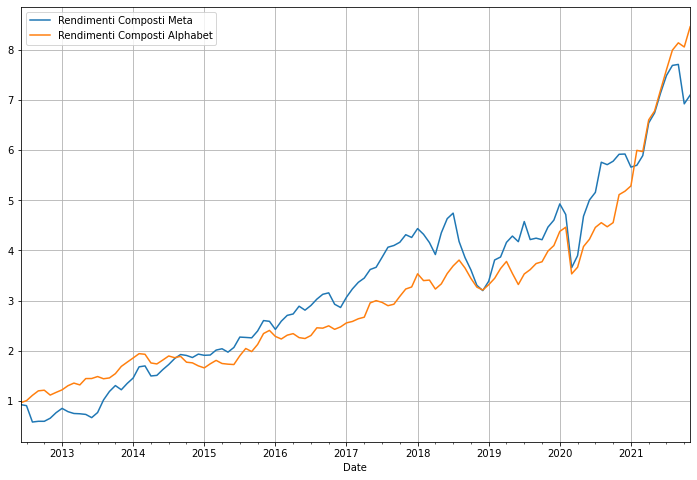

In [20]:
# Plot del grafico dei rendimenti composti, con i rispettivi titoli
rendimenti_tecno[["Rendimenti Composti Meta", "Rendimenti Composti Alphabet"]].plot(figsize=(12,8), grid=True)
plt.show()